<a href="https://colab.research.google.com/github/nataliacalado/portfolio/blob/master/An%C3%A1lise_de_Dados_do_Airbnb_Amsterd%C3%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://i.ya-webdesign.com/images/air-bnb-png-8.png" width="20%"></center>

# **Análise dos Dados do Airbnb - Amsterdã**

A startup [Airbnb](https://www.airbnb.com.br) fundada em 2008 por Brian Chesky, Joe Gebbia e Nathan Blecharczyk em São Francisco, na Califórnia permite que pessoas ao redor do mundo possam locar toda ou parte de uma residência, como uma forma de acomodação.

Para aqueles individuos em que a viagem é o bem mais prazeroso esta ferramenta se torna essencial para dar um *upgrade* em suas experiências.

A plataforma faz a ligação entre as pessoas que querem viajar (e se hospedar) com os anfitriões por meio de buscas e reservas. 

**Abrangendo mais de 500 mil anúncios em mais de 35.000 cidades e 192 países, o Airbnb já contabiliza mais de 10 milhões de reservas agendadas pelo seu site/app.**

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

**Neste *notebook*, iremos analisar os dados referente à cidade de Amsterdã, 
e ver quais insights podem ser extraídos a partir de dados brutos.**

-------


# Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Amsterdam (good for visualisations).*



Para esta análise iremos utilizar os pacotes **`pandas`**, **`matplotlib`** e **`seaborn`**.

> **PANDAS:** é uma biblioteca *open-source* para análise e manipulação de dados, sendo considerada uma ferramenta rápida, flexível e fácil de usar. 

> **MATPLOTLIB:** é uma biblioteca utilizada para a criação de gráficos comuns com uma alta qualidade a partir de comandos simples, onde foi inspirado nos comandos gráficos do *MATLAB*.

> **SEABORN:** essa biblioteca é um complemento para o `matplotlib`, ajudando a melhorar a visual dos gráficos.




In [0]:
# importar os pacotes necessarios

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listing.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2019-12-07/visualisations/listings.csv")

# Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* **`id:`** número de id gerado para identificar o imóvel
* **`name:`** nome da propriedade anunciada
* **`host_id:`** número de id do proprietário (anfitrião) da propriedade
* **`host_name:`** nome do anfitrião
* **`neighbourhood_group:`** esta coluna não contém nenhum valor válido
* **`neighbourhood:`** nome do bairro
* **`latitude:`** coordenada da latitude da propriedade
* **`longitude:`** coordenada da longitude da propriedade
* **`room_type:`** informa o tipo de quarto que é oferecido
* **`price:`** preço para alugar o imóvel
* **`minimum_nights:`** quantidade mínima de noites para reservar
* **`number_of_reviews:`** número de reviews que a propriedade possui
* **`last_review:`** data do último review
* **`reviews_per_month:`** quantidade de reviews por mês
* **`calculated_host_listings_count:`** quantidade de imóveis do mesmo anfitrião
* **`availability_365:`** número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras emtradas.


In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,277,2019-11-21,2.13,1,0
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,80,1,306,2019-12-05,2.57,2,198
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,3,2019-05-11,0.13,2,71
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38673,4.89208,Private room,155,2,206,2019-11-11,2.14,1,251
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36719,4.89092,Private room,75,2,318,2019-11-23,2.81,3,134


#**Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos dar continuidade as análises e seguir para o próximo passo que é identificar a quantidade de entradas que nosso conjunto de dados possui e ver quais os tipos em cada coluna.

O *dataset* que baixamos anteriormente é a versão "resumida" do Airbnb, mas no memso local pode-se encontrar a versão completa com um total de 106 variáveis e 20025 entradas (`listings.csv.gz`).


In [0]:
# Identificar o volume de dados do DataFrame
print("Variáveis:\t {}".format(df.shape[0]))
print("Entradas:\t {}\n".format(df.shape[1]))

# Verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Variáveis:	 20025
Entradas:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Para podermos termos um *dataset* de qualidade precisamos validar se existe valores ausentes (nulos). 

Este *check* inicial é essencial para qualquer projeto a ser realizado e temos que verificar se esses valores nulos são significativos comparados ao total de entrada.

* É possível ver que a coluna `neighbourhood_group` possui **100%** dos seus valores faltantes.
* As colunas `reviews_per_month` e `last_review` possuem **12%** de valores nulos.
* As variáveis `host_name` e `name` têm aproximadamente **0,1%** de seus valores ausentes.
* As demais informações estão todas completas.

In [0]:
# Ordernar de forma decrescente as variáveis por seus valores ausentes
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

neighbourhood_group               100.000000
reviews_per_month                  12.004994
last_review                        12.004994
host_name                           0.789014
name                                0.169788
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

# **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar o tipo de distribuição das variáveis, irei plotar o histograma.

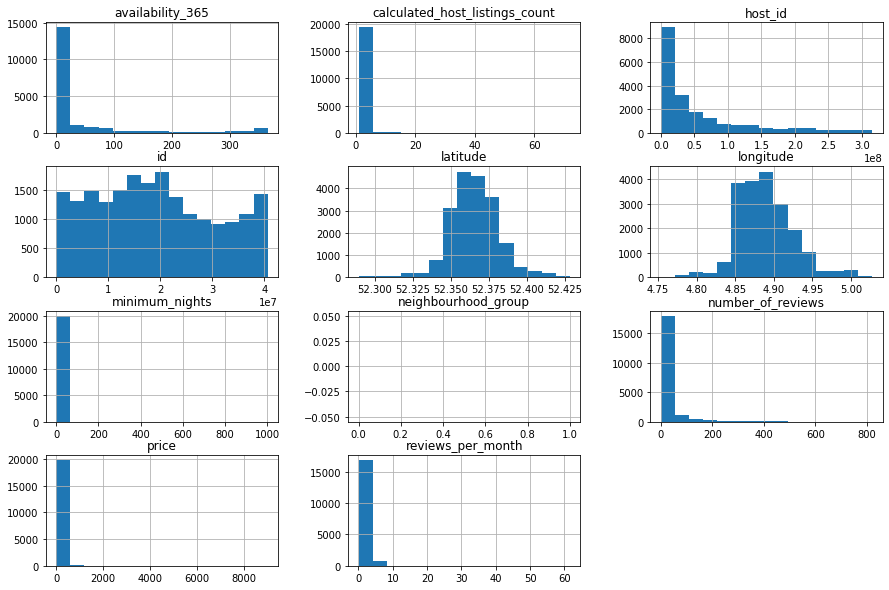

In [0]:
# Plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

# **Q4. Há *outliers* presentes?**

Através da plotagem que fizemos acima conseguimos identificar que há sim a presença de *outliers*.

Nas variáveis `price`, `reviews_per_month`, `number_of_reviews`, `minimum_nights`e `calculated_host_listings_count` os valores não seguem uma distribuição, e distorcem toda a representação gráfica.

Para validar se essas colunas possuem de fato essas distorções, podemos utilizar duas maneiras rápidas que auxiliam na detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `discribe()`
* Plotar `boxplot` para as variáveis.


#### Método estatístico `discribe()`

A função `describe()` é muito interessante, pois calcula estatísticas para cada coluna numérica do DataFrame, como por exemplo, contagem de valores, soma, média e mediana. Com isso conseguimos ter uma ideia dos dados que estão sendo trabalhos nas análises.

* **`count:`** quantidade de inputs disponíveis.
* **`mean:`**  valor da média aritmética da variável. 
* **`std:`**   é o desvio padrão da variável. Sendo a medida de dispersão em torno da média populacional de uma variável aleatória.
Se tivermos um baixo desvio padrão significa que os pontos dos dados tendem a estar próximos da média ou do valor esperado, caso contrário, significa que os pontos estão espalhados por uma ampla gama de valores.
* **`min:`**   menor valor encontrado na coluna.
* **`max:`**   maior valor encontrado na coluna.
* **`25%:`**   denominado como percentil inferior, mostra que 25% das informações disponíveis nessa variável possuem o valor >= ao mostrado.
* **`50%:`**   consideramos como sendo a mediana, onde mostra que 50% das informações disponíveis nessa variável possuem o valor >= ao mostrado.
* **`75%:`**   denominado como percentil superior, mostra que 75% das informações disponíveis nessa variável possuem o valor >= ao mostrado.



In [0]:
# Ver o resumo estatístico das variáveis numéricas
df[['price','reviews_per_month', 'number_of_reviews', 'minimum_nights', 'calculated_host_listings_count']].describe()

,price,reviews_per_month,number_of_reviews,minimum_nights,calculated_host_listings_count
count,20025.000000,17621.000000,20025.000000,20025.000000,20025.000000
mean,163.251685,0.975181,24.659925,3.425069,1.972185
std,198.538156,1.462001,52.010732,14.740805,5.196736
min,0.000000,0.010000,0.000000,1.000000,1.000000
25%,99.000000,0.220000,2.000000,2.000000,1.000000
50%,130.000000,0.510000,9.000000,2.000000,1.000000
75%,185.000000,1.030000,23.000000,3.000000,1.000000
max,9000.000000,61.590000,821.000000,1001.000000,72.000000


Através dos dados estatísticos gerados acima, podemos concluir algumas hipoteses como:

*  **`price:`** possui 75% de seu valor igual ou menos que 185, porém o valor máximo é 9000.
* **`minimum_nights:`** a quantidade mínima de noites está acima do limite real de 365 dias no ano.

#### Boxplot para price

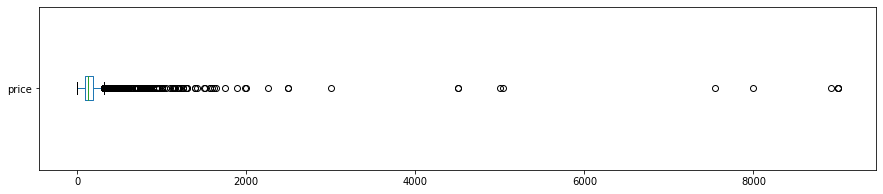

price - valores acima de 163:
6503 entradas
32.4744%


In [0]:
# Price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Ver quantidade de valores acima de 163 para price
print("price - valores acima de 163:")
print("{} entradas".format(len(df[df.price>163])))
print("{:.4f}%".format((len(df[df.price>163])/df.shape[0])*100))

#### Boxplot para reviews per month

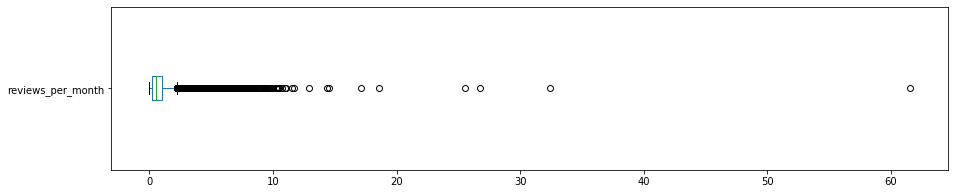

reviews per month - valores acima de 1:
4527 entradas
22.6067%


In [0]:
# Reviews per month
df.reviews_per_month.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Ver quantidade de valores acima de 1 para reviews per month
print("reviews per month - valores acima de 1:")
print("{} entradas".format(len(df[df.reviews_per_month>1])))
print("{:.4f}%".format((len(df[df.reviews_per_month>1])/df.shape[0])*100)) 

#### Boxplot para number of reviews

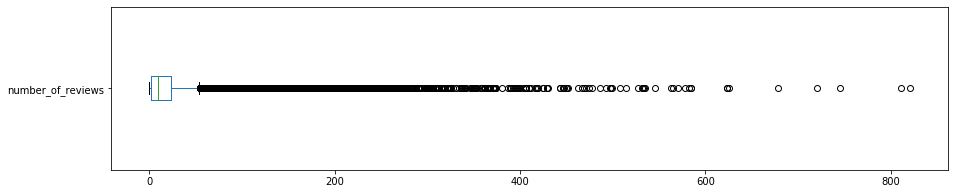

number of reviews - valores acima de 25:
4620 entradas
23.0712%


In [0]:
# Number of reviews
df.number_of_reviews.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Ver quantidade de valores acima de 25 para number of reviews
print("number of reviews - valores acima de 25:")
print("{} entradas".format(len(df[df.number_of_reviews>25])))
print("{:.4f}%".format((len(df[df.number_of_reviews>25])/df.shape[0])*100))

#### Boxplot para minimum nights

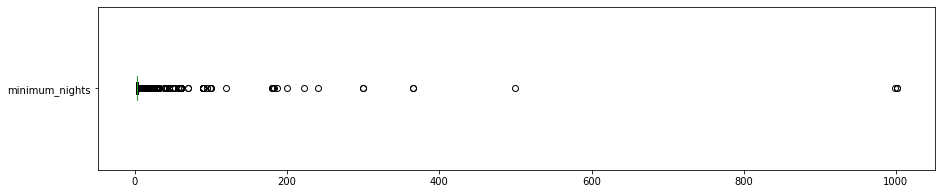

minimum nights - valores acima de 3:
4 entradas
0.0200%


In [0]:
# Minimum nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Ver quantidade de valores acima de 3 para minimum nights
print("minimum nights - valores acima de 3:")
print("{} entradas".format(len(df[df.minimum_nights>365])))
print("{:.4f}%".format((len(df[df.minimum_nights>365])/df.shape[0])*100))

#### Boxplot para calculated host listings count

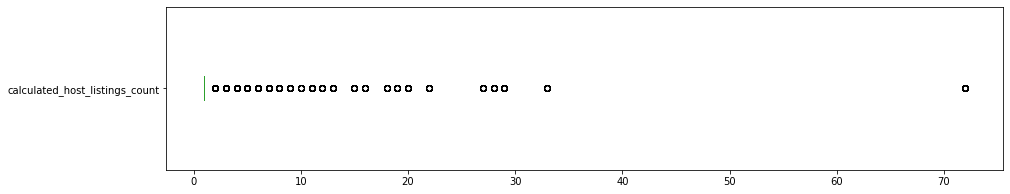

calculated host listings count - valores acima de 30:
105 entradas
0.5243%


In [0]:
# Calculated host listings count
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Ver quantidade de valores acima de 30 para calculated host listings count
print("calculated host listings count - valores acima de 30:")
print("{} entradas".format(len(df[df.calculated_host_listings_count>30])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count>30])/df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis acima, vamos agora fazer a limpeza do *DataFrame* e plotar novamente as variáveis.


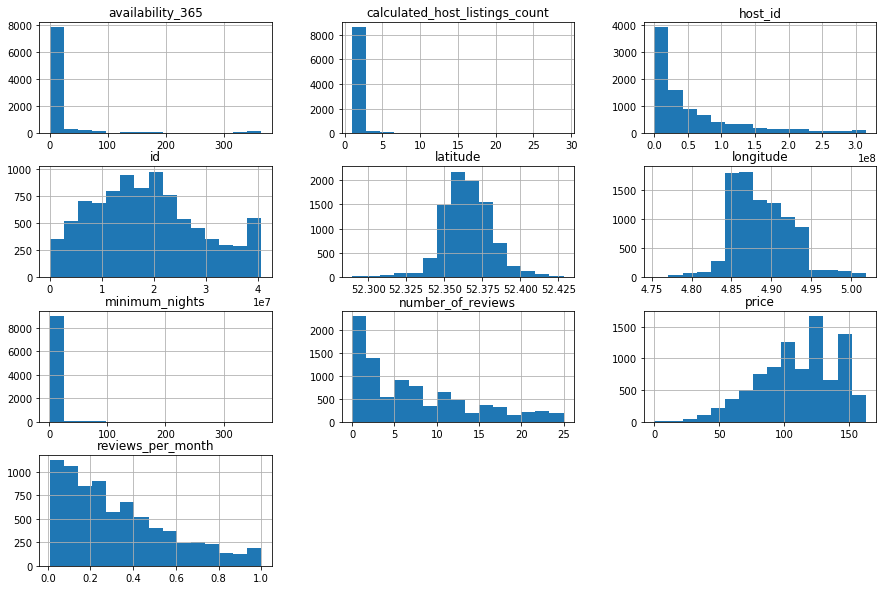

In [0]:
# Remover os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 163].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 1].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 25].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 365].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 30].index, axis=0, inplace=True)

# Remover 'neighbourhood_group', pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

# **Q5. Qual a correlação existente entre as variáveis**

Correlação é quando se tem qualquer relação estatística, com ou sem causa, entre duas variáveis.

No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [0]:
# Criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.023240,0.093326,0.098897,0.015793,0.045114
minimum_nights,-0.023240,1.000000,-0.033741,-0.065846,-0.024185,0.181603
number_of_reviews,0.093326,-0.033741,1.000000,0.495655,-0.015131,0.006488
reviews_per_month,0.098897,-0.065846,0.495655,1.000000,0.076626,0.144417
calculated_host_listings_count,0.015793,-0.024185,-0.015131,0.076626,1.000000,0.113074
availability_365,0.045114,0.181603,0.006488,0.144417,0.113074,1.000000


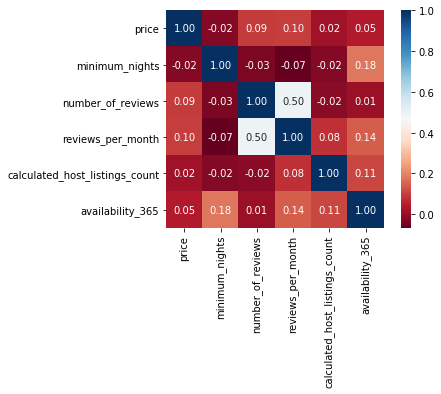

In [0]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

# **Q6. Quais os melhores imóveis para alugar no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.


#### Quantidade de disponibilidade dos tipos de imóveis

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.*italicized text*

In [0]:
# Mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    7429
Private room       1573
Hotel room           49
Shared room          31
Name: room_type, dtype: int64

In [0]:
# Mostrar o percentual de cada tipo de imóvel disponível
(df_clean.room_type.value_counts()/df.shape[0])*100

Entire home/apt    37.098627
Private room        7.855181
Hotel room          0.244694
Shared room         0.154806
Name: room_type, dtype: float64

Com essa análise conseguimos ver que em Amsterdã temos Casas e Apartamentos Inteiros com a maior quantidade para locação, sendo 7.429 (37,1%), seguido pelos quartos privados com 1.573 (7,9%) da base total.

In [14]:
print('Preço por tipo de imóvel:')
df_clean.groupby(['room_type']).price.mean().sort_values(ascending=False)

Preço por tipo de imóvel:


room_type
Entire home/apt    116.928523
Hotel room         113.775510
Private room        83.551176
Shared room         67.193548
Name: price, dtype: float64

Vemos que o valor do quarto privado está aproximadamente 30,00 abaixo do quarto em hotel, então entre os tipos de acomodações que o Airbnb oference os quartos privativos acaba sendo uma excelente opção para os turistas.

# **Q6. Qual o valor das residências por localidade de Amsterdã?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [0]:
print('Preço por localidade:')
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)


Preço por localidade:


neighbourhood
Centrum-West                              121.296564
Centrum-Oost                              117.963671
De Pijp - Rivierenbuurt                   115.376138
Oud-Oost                                  115.214599
Westerpark                                113.639726
Zuid                                      112.810811
De Baarsjes - Oud-West                    112.393678
Noord-West                                110.137363
IJburg - Zeeburgereiland                  109.791444
Oud-Noord                                 108.843750
Oostelijk Havengebied - Indische Buurt    106.164875
Noord-Oost                                106.026667
Watergraafsmeer                           105.282443
Bos en Lommer                             105.095168
De Aker - Nieuw Sloten                    100.645161
Buitenveldert - Zuidas                    100.419355
Slotervaart                                98.600000
Geuzenveld - Slotermeer                    97.335938
Osdorp                          

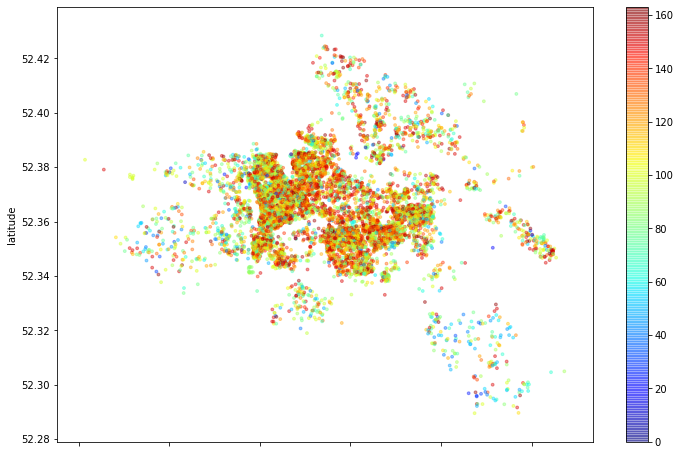

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Sobre as regiões que estão sendo cobertas pelo Airbnb, conseguimos ver que quanto mais próximo do centro for realizado a locação mais caro será.

Por tanto, por ser uma região com um transporte público de altissima qualidade e por ter vias para ciclistas, pode-se pensar em realizar a locação em um ponto um pouco mais afastado, pois além de economizar pode aproveitar um pouco mais da cultura do país.